# Data Analysis and Mining - Linear Regression

## Objectives

- Perform simple linear regression
- Use correlation analysis to determine whether two quantities are related to justify fitting the data.
- Fit a linear model to the data.
- Evaluate the goodness of fit by plotting residuals and looking for patterns.
- Calculate measures of goodness of fit R2 and adjusted R2

## Initialization

### Import libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from numpy.linalg import inv
from numpy import dot
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_style("darkgrid")

### Load data

Start by loading the entire dataset.

In [69]:
# Specify the path to the dataset CSV file
dataset_path = "../../Dataset/dataset.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path)

df.head()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


### Data cleaning

First, we drop columns that we do not need. In addition, we add one more column which represents the percentage of win games, as it is one of the most interesting features.

In [70]:
# Drop columns 'TEAM', 'CONF', 'POSTSEASON'
df = df.drop(['TEAM', 'CONF', 'POSTSEASON'], axis=1)

# Add column percentage of wins as W/G
df['W/G'] = df['W'] / df['G'] * 100

Check the size of the dataset.

In [71]:
df.shape

(1757, 22)

We decided to analyze a subset of the whole dataset. Since our dataset is a collection of data which belongs to 5 different seasons, we filter the dataset by only keeping and analyzing the information related to one year.

In [72]:
# Filter by year, keep only data from selected year
df = df[df['YEAR'] == 2015]

## Analysis

### Correlation Analysis

Check the correlation between different pairs of columns to see which variables are potentially related. We will take ADJOE, ADJDE and BARTHAG as they are known for being quite correlated to the percentage of win games.

In [73]:
# Get slices with ADJOE, ADJDE and BARTHAG
X_ADJOE = df[['ADJOE']].values
X_ADJDE = df[['ADJDE']].values
X_BARTHAG = df[['BARTHAG']].values

# Reshape them to be column vectors
X_ADJOE = X_ADJOE.reshape(-1, 1)
X_ADJDE = X_ADJDE.reshape(-1, 1)
X_BARTHAG = X_BARTHAG.reshape(-1, 1)

# Get slice with W/G
Y = df['W/G'].values.reshape(-1, 1)

Plot Y and X_ADJOE

[Text(0.5, 0, 'ADJOE'), Text(0, 0.5, 'Percentage of wins')]

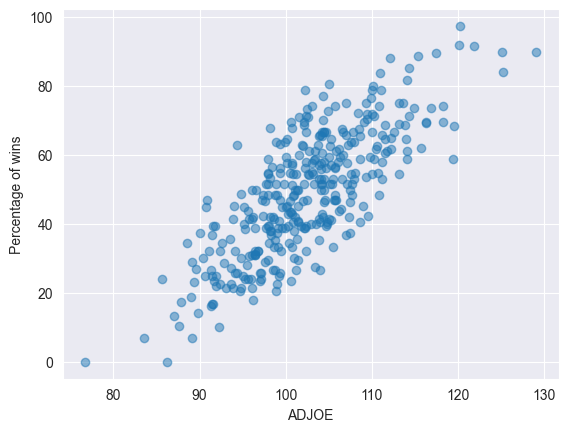

In [74]:
ax = sns.regplot(x=X_ADJOE, y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ADJOE', ylabel='Percentage of wins')

Plot Y and X_ADJDE

[Text(0.5, 0, 'ADJDE'), Text(0, 0.5, 'Percentage of wins')]

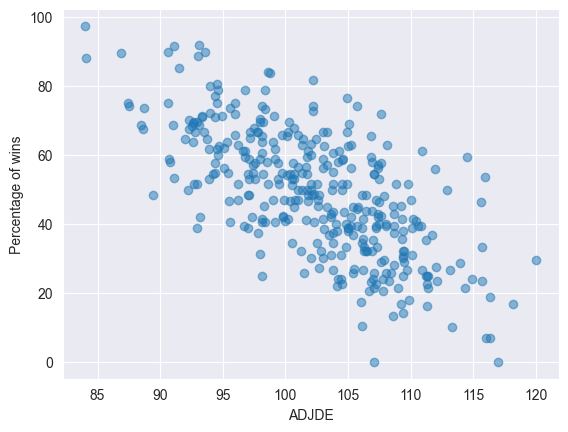

In [75]:
ax = sns.regplot(x=X_ADJDE, y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ADJDE', ylabel='Percentage of wins')

Plot Y and X_BARTHAG

[Text(0.5, 0, 'BARTHAG'), Text(0, 0.5, 'Percentage of wins')]

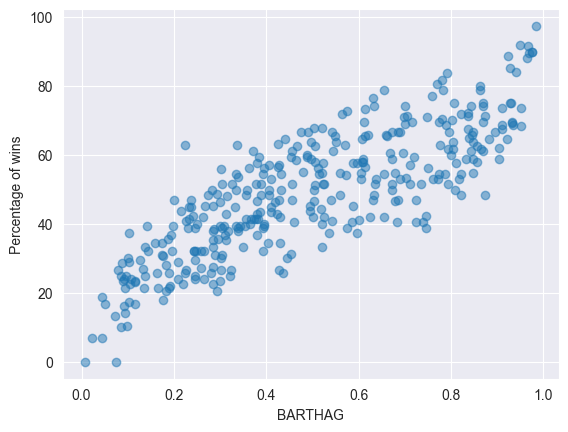

In [76]:
ax = sns.regplot(x=X_BARTHAG, y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='BARTHAG', ylabel='Percentage of wins')

In order to approximate $$Y = \beta X + \epsilon$$ we will use Least Squares

$$\hat{\beta} = (X^TX)^{-1}X^TY$$  

Let us start without introducing the intercept term.

In [77]:
# Find beta for ADJOE
beta_ADJOE = dot(dot(inv(dot(X_ADJOE.T, X_ADJOE)), X_ADJOE.T), Y) 
print('Estimated coefficient for ADJOE:', beta_ADJOE[0])

# Find beta for ADJDE
beta_ADJDE = dot(dot(inv(dot(X_ADJDE.T, X_ADJDE)), X_ADJDE.T), Y)
print('Estimated coefficient for ADJDE:', beta_ADJDE[0])

# Find beta for BARTHAG
beta_BARTHAG = dot(dot(inv(dot(X_BARTHAG.T, X_BARTHAG)), X_BARTHAG.T), Y)
print('Estimated coefficient for BARTHAG:', beta_BARTHAG[0])

Estimated coefficient for ADJOE: [0.48653126]
Estimated coefficient for ADJDE: [0.46951381]
Estimated coefficient for BARTHAG: [90.5247366]


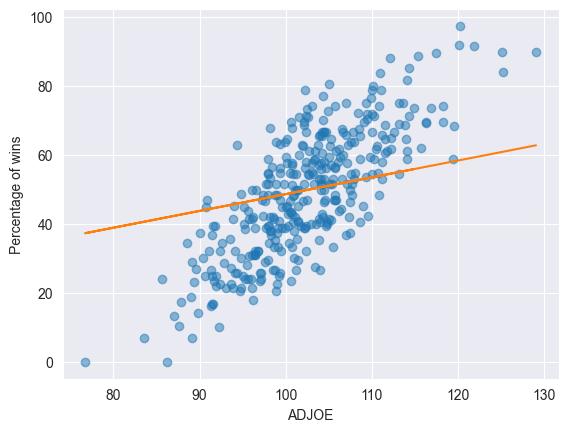

In [78]:
# Predictions for ADJOE
predictions_ADJOE = X_ADJOE * beta_ADJOE

ax = sns.regplot(x=X_ADJOE, y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ADJOE', ylabel='Percentage of wins')
plt.plot(X_ADJOE, predictions_ADJOE)

plt.show()

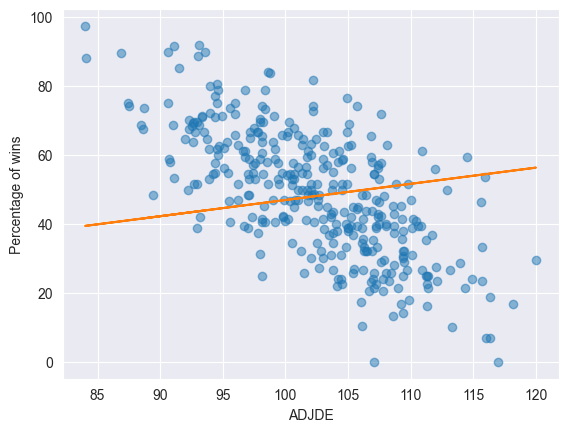

In [79]:
# Predictions for ADJDE
predictions_ADJDE = X_ADJDE * beta_ADJDE
 
ax = sns.regplot(x=X_ADJDE, y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ADJDE', ylabel='Percentage of wins')
plt.plot(X_ADJDE, predictions_ADJDE)

plt.show()

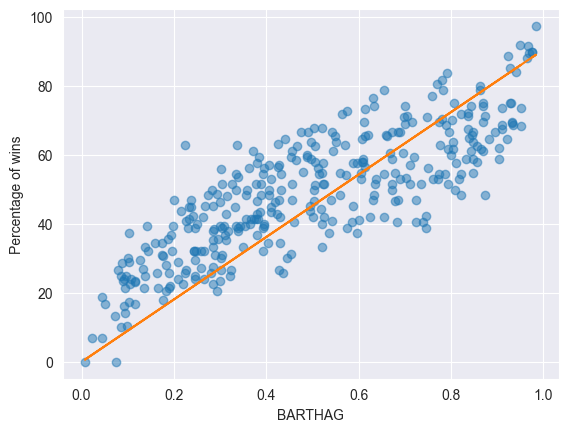

In [80]:
# Predictions for BARTHAG
predictions_BARTHAG = X_BARTHAG * beta_BARTHAG
 
ax = sns.regplot(x=X_BARTHAG, y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='BARTHAG', ylabel='Percentage of wins')
plt.plot(X_BARTHAG, predictions_BARTHAG)

plt.show()

Let us now introduce the intercept term.

In [81]:
# Add constant term as a column
X_ADJOE = np.c_[X_ADJOE, np.ones(len(X_ADJOE))]
X_ADJDE = np.c_[X_ADJDE, np.ones(len(X_ADJDE))]
X_BARTHAG = np.c_[X_BARTHAG, np.ones(len(X_BARTHAG))]

# Find beta for ADJOE
beta_ADJOE = dot(dot(inv(dot(X_ADJOE.T, X_ADJOE)), X_ADJOE.T), Y) 
beta_ADJOE = np.reshape(beta_ADJOE, (-1,1))
print('Estimated coefficients for ADJOE:', beta_ADJOE[0], beta_ADJOE[1])

# Find beta for ADJDE
beta_ADJDE = dot(dot(inv(dot(X_ADJDE.T, X_ADJDE)), X_ADJDE.T), Y)
beta_ADJDE = np.reshape(beta_ADJDE, (-1,1))
print('Estimated coefficients for ADJDE:', beta_ADJDE[0], beta_ADJDE[1])

# Find beta for BARTHAG
beta_BARTHAG = dot(dot(inv(dot(X_BARTHAG.T, X_BARTHAG)), X_BARTHAG.T), Y)
beta_BARTHAG = np.reshape(beta_BARTHAG, (-1,1))
print('Estimated coefficients for BARTHAG:', beta_BARTHAG[0], beta_BARTHAG[1])

Estimated coefficients for ADJOE: [1.90760887] [-146.1568167]
Estimated coefficients for ADJDE: [-1.89325059] [242.72256917]
Estimated coefficients for BARTHAG: [58.05730397] [20.34630072]


And repeat.

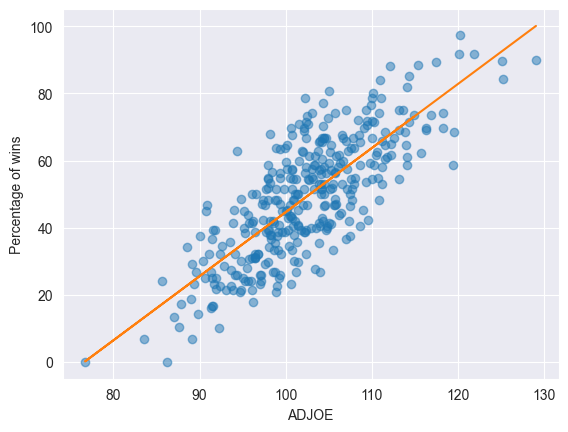

In [82]:
# Matrix multiplication between X_ADJOE and beta_ADJOE
predictions_ADJOE = dot(X_ADJOE, beta_ADJOE)

ax = sns.regplot(x=X_ADJOE[:,0], y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ADJOE', ylabel='Percentage of wins')
plt.plot(X_ADJOE[:,0], predictions_ADJOE)

plt.show()

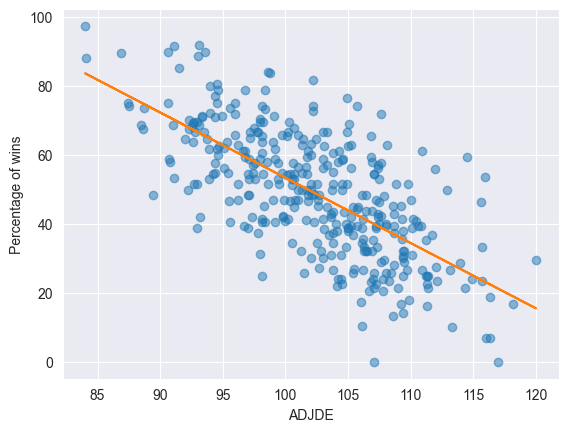

In [83]:
# Matrix multiplication between X_ADJDE and beta_ADJDE
predictions_ADJDE = dot(X_ADJDE, beta_ADJDE)
 
ax = sns.regplot(x=X_ADJDE[:,0], y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='ADJDE', ylabel='Percentage of wins')
plt.plot(X_ADJDE[:,0], predictions_ADJDE)

plt.show()

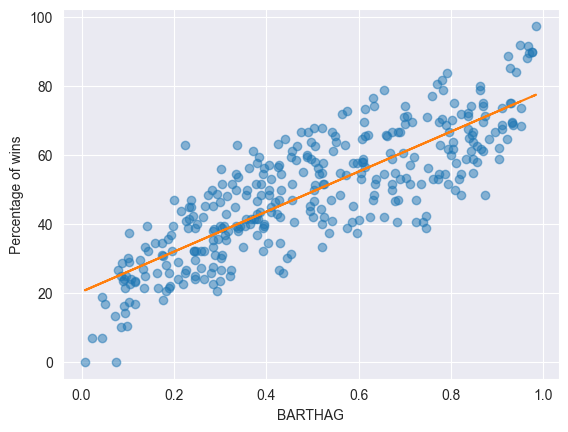

In [84]:
# Matrix multiplication between X_BARTHAG and beta_BARTHAG
predictions_BARTHAG = dot(X_BARTHAG, beta_BARTHAG)
 
ax = sns.regplot(x=X_BARTHAG[:,0], y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='BARTHAG', ylabel='Percentage of wins')
plt.plot(X_BARTHAG[:,0], predictions_BARTHAG)

plt.show()

### Residuals and Goodness of Fit

One measure of goodness of fit is the Coefficient of Determination, or $R^2$ (pronounced r-square)  

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

Where:
- $ SS_{res} $ is the sum of squares of residuals (SSE), which represents the total variation in the dependent variable that is not explained by the independent variables.
- $ SS_{tot} $ is the total sum of squares (TSS), which represents the total variation in the dependent variable.


In [85]:
# Compute for ADJOE
sstotal_ADJOE = np.sum((Y - np.mean(Y))**2)
ssres_ADJOE = np.sum((Y - predictions_ADJOE)**2)
rsq_ADJOE = 1 - (ssres_ADJOE / sstotal_ADJOE)

# Compute for ADJDE
sstotal_ADJDE = np.sum((Y - np.mean(Y))**2)
ssres_ADJDE = np.sum((Y - predictions_ADJDE)**2)
rsq_ADJDE = 1 - (ssres_ADJDE / sstotal_ADJDE)
      
# Compute for BARTHAG
sstotal_BARTHAG = np.sum((Y - np.mean(Y))**2)
ssres_BARTHAG = np.sum((Y - predictions_BARTHAG)**2)
rsq_BARTHAG = 1 - (ssres_BARTHAG / sstotal_BARTHAG)


print('Coefficient of Determinacy, model for ADJOE:', np.round(rsq_ADJOE, 2))
print('Coefficient of Determinacy, model for ADJDE:', np.round(rsq_ADJDE, 2))
print('Coefficient of Determinacy, model for BARTHAG:', np.round(rsq_BARTHAG, 2))

Coefficient of Determinacy, model for ADJOE: 0.61
Coefficient of Determinacy, model for ADJDE: 0.47
Coefficient of Determinacy, model for BARTHAG: 0.68


## Normality hypothesis for the residuals

Obtain a normal probability plot of the standardized residuals from this regression.

(20.0, 80.0)

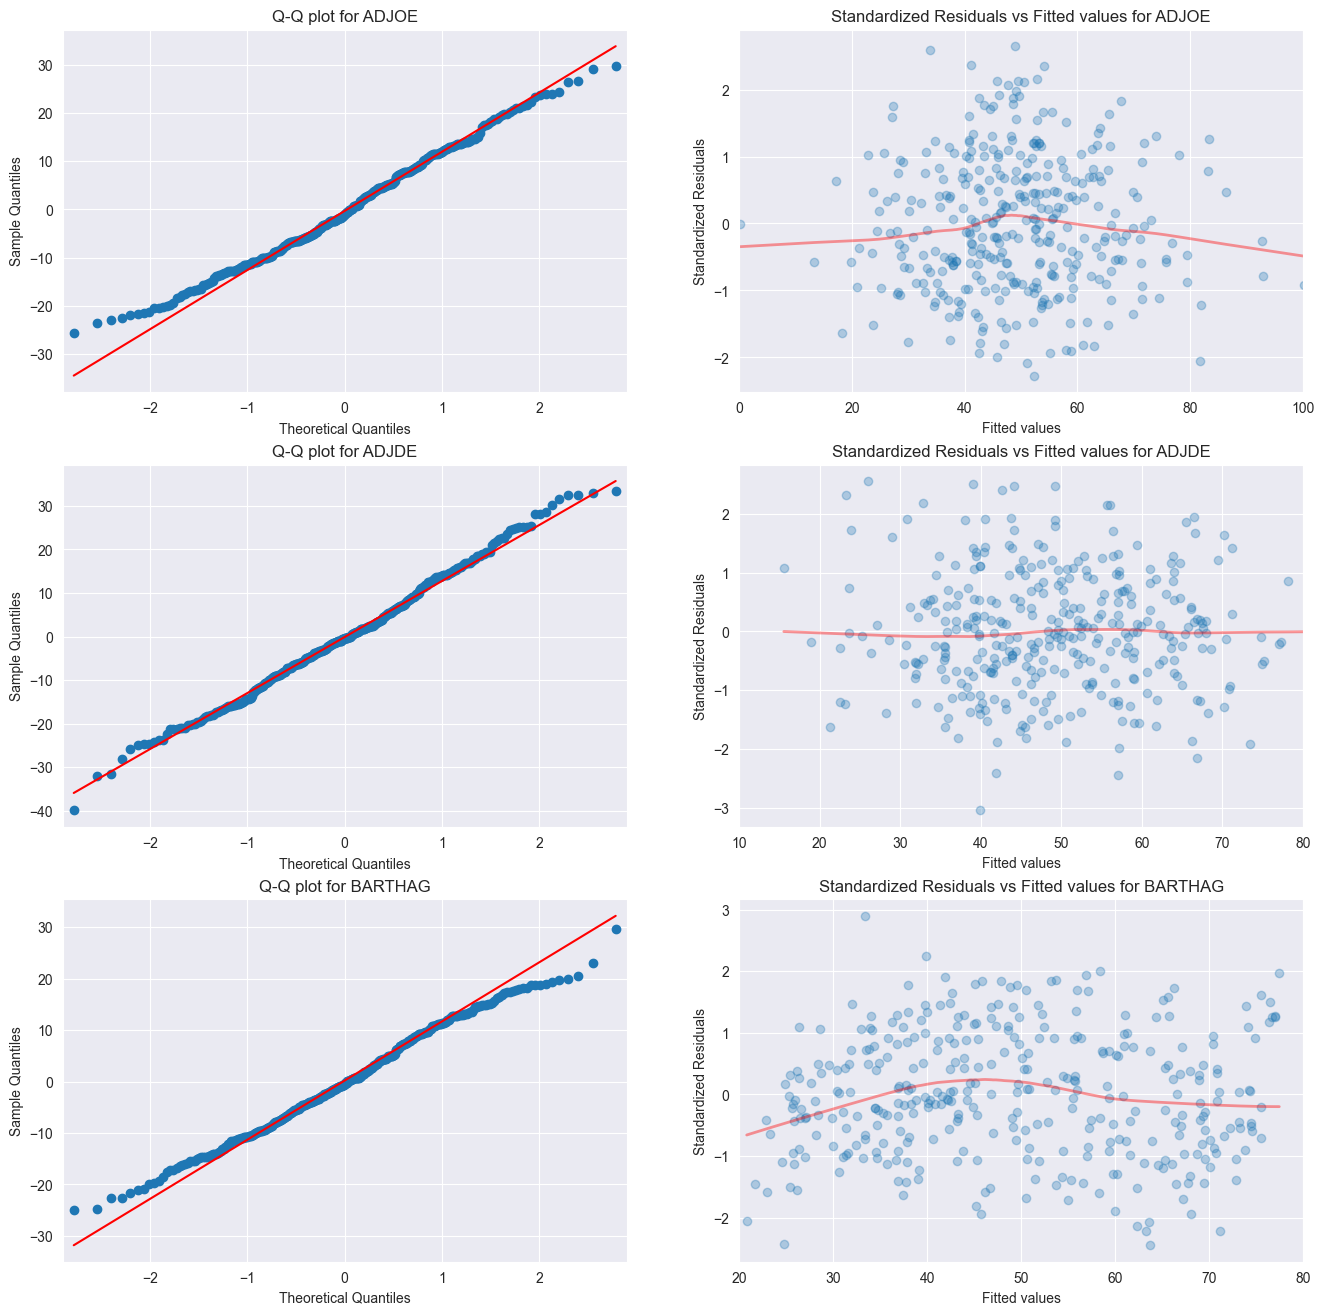

In [86]:
# Prepare subplots
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16, 16))

# Compute degrees_of_freedom
degrees_of_freedom = len(Y) - X_ADJOE.shape[1]

# --------- ADJOE ---------

# And plot Q-Q for ADJOE
sm.qqplot((Y - predictions_ADJOE)[:,0], stats.t, distargs=(degrees_of_freedom,), line='q', ax=axs[0][0])
axs[0][0].set_title(label = 'Q-Q plot for ADJOE')

# Then compute what is necessary for the residuals plot for ADJOE
residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum( ((Y - predictions_ADJOE)[:,0])**2) )
leverage = ( (1/len(X_ADJOE)) + ( ( (X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2 ) / np.sum( (X_ADJOE[:,0] - np.mean(X_ADJOE[:,0]))**2) ) )
standardized_residuals = (Y - predictions_ADJOE)[:,0] / (residuals_standard_error * np.sqrt( 1 - leverage))

# And plot it for ADJOE
sns.regplot(x = predictions_ADJOE[:,0], y=standardized_residuals, ax=axs[0][1], lowess=True, scatter_kws={'alpha':0.3}, line_kws={"color":"r","alpha":0.4,"lw":2})
axs[0][1].set_title(label = 'Standardized Residuals vs Fitted values for ADJOE')
axs[0][1].set(ylabel='Standardized Residuals', xlabel='Fitted values')
axs[0][1].set_xlim(0,100)

# --------- ADJDE ---------

# And plot Q-Q for ADJDE
sm.qqplot((Y - predictions_ADJDE)[:,0], stats.t, distargs=(degrees_of_freedom,), line='q', ax=axs[1][0])
axs[1][0].set_title(label = 'Q-Q plot for ADJDE')

# Then compute what is necessary for the residuals plot for ADJDE
residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum( ((Y - predictions_ADJDE)[:,0])**2) )
leverage = ( (1/len(X_ADJDE)) + ( ( (X_ADJDE[:,0] - np.mean(X_ADJDE[:,0]))**2 ) / np.sum( (X_ADJDE[:,0] - np.mean(X_ADJDE[:,0]))**2) ) )
standardized_residuals = (Y - predictions_ADJDE)[:,0] / (residuals_standard_error * np.sqrt( 1 - leverage))

# And plot it for ADJDE
sns.regplot(x = predictions_ADJDE[:,0], y=standardized_residuals, ax=axs[1][1], lowess=True, scatter_kws={'alpha':0.3}, line_kws={"color":"r","alpha":0.4,"lw":2})
axs[1][1].set_title(label = 'Standardized Residuals vs Fitted values for ADJDE')
axs[1][1].set(ylabel='Standardized Residuals', xlabel='Fitted values')
axs[1][1].set_xlim(10,80)

# --------- BARTHAG ---------

# And plot Q-Q for BARTHAG
sm.qqplot((Y - predictions_BARTHAG)[:,0], stats.t, distargs=(degrees_of_freedom,), line='q', ax=axs[2][0])
axs[2][0].set_title(label = 'Q-Q plot for BARTHAG')

# Then compute what is necessary for the residuals plot for BARTHAG
residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum( ((Y - predictions_BARTHAG)[:,0])**2) )
leverage = ( (1/len(X_BARTHAG)) + ( ( (X_BARTHAG[:,0] - np.mean(X_BARTHAG[:,0]))**2 ) / np.sum( (X_BARTHAG[:,0] - np.mean(X_BARTHAG[:,0]))**2) ) )
standardized_residuals = (Y - predictions_BARTHAG)[:,0] / (residuals_standard_error * np.sqrt( 1 - leverage))

# And plot it for BARTHAG
sns.regplot(x = predictions_BARTHAG[:,0], y=standardized_residuals, ax=axs[2][1], lowess=True, scatter_kws={'alpha':0.3}, line_kws={"color":"r","alpha":0.4,"lw":2})
axs[2][1].set_title(label = 'Standardized Residuals vs Fitted values for BARTHAG')
axs[2][1].set(ylabel='Standardized Residuals', xlabel='Fitted values')
axs[2][1].set_xlim(20,80)


1. Zero Mean Assumption  
    $E(\epsilon |X) = 0$, in the second figure we can check that the mean of residuals along the domain falls relatively on a straight line, as shown by over positioning of the lowess curve (applied to the data) and the horizontal line at zero.  
2. Constant Variance Assumption  
    Checking the second figure, the constant variance assumption in our model is satisfied as well.
3. Independence Assumption  
    In the second figure, the points are more or less symmetrically distributed around the horizontal line, meaning the model does not systematically underpredicts or overpredicts when the independent variable has a particular configuration.  
4. Normality Assumption  
    The first plot shows us that there is a slight S shape, more pronounced at higher values. 

## Feature engineering

Do regression analysis with a Log transformation on the target class.

Estimated coefficients for ADJOE: [1.90760887] [-146.1568167]


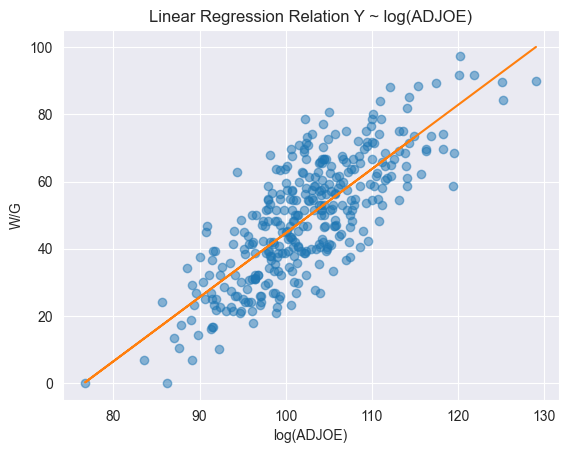

In [87]:
# Eliminate zero values from df
df2 = df[df['W/G'] != 0]

# Make log transformation to ADJOE
df2.loc[:, 'ADJOE'] = np.log(df2['ADJOE'])

# Get slices with ADJOE_LOG
X_ADJOE_LOG = np.c_[df[['ADJOE']].values, np.ones(len(df[['ADJOE']].values))]

# Perform linear regression
beta_ADJOE_LOG = np.linalg.lstsq(X_ADJOE_LOG, Y, rcond=None)[0]
print('Estimated coefficients for ADJOE:', beta_ADJOE_LOG[0], beta_ADJOE_LOG[1])
predictions_ADJOE_LOG = dot(X_ADJOE_LOG, beta_ADJOE_LOG) 

# And plot it
ax = sns.regplot(x=X_ADJOE_LOG[:,0], y=Y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='log(ADJOE)',  ylabel='W/G', title='Linear Regression Relation Y ~ log(ADJOE)')
plt.plot(X_ADJOE_LOG[:,0], predictions_ADJOE_LOG)
plt.show()

In [88]:
# Compute R-square
ssres_ADJOE_LOG = np.sum((Y - predictions_ADJOE_LOG)**2)
rsq_ADJOE_LOG = 1 - (ssres_ADJOE_LOG / sstotal_ADJOE)
print('Coefficient of Determinacy:', np.round(rsq_ADJOE_LOG, 2))

Coefficient of Determinacy: 0.61


Obtain a normal probability plot of the standardized residuals from this regression.

(0.0, 100.0)

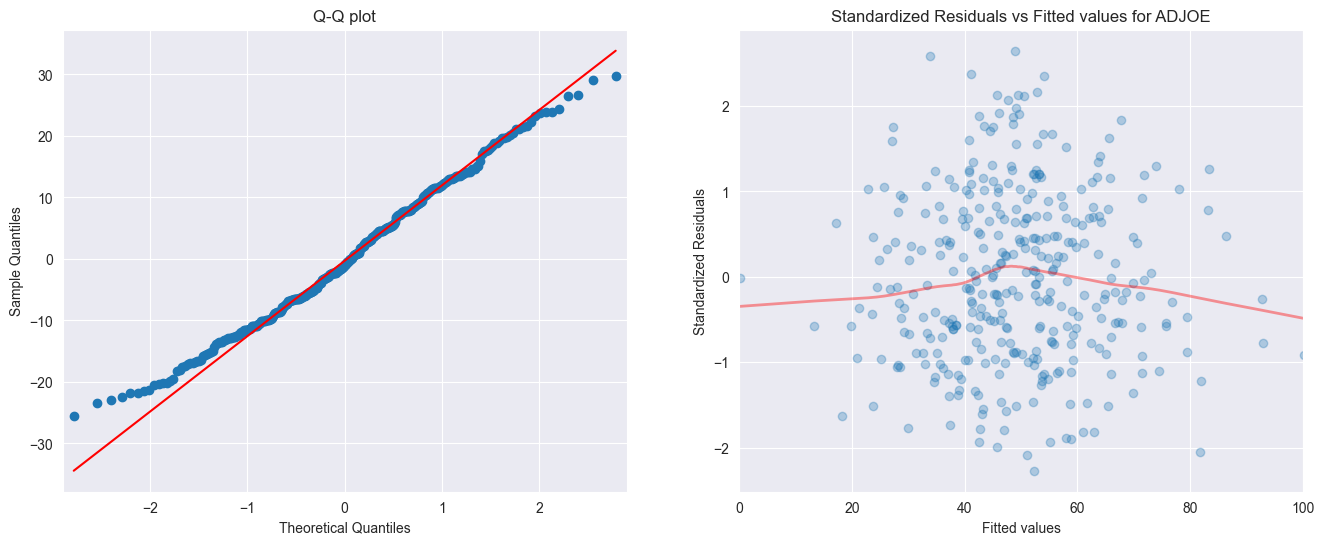

In [91]:
# Prepare subplots
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))

# Compute degrees_of_freedom
degrees_of_freedom = len(Y) - X_ADJOE_LOG.shape[1]

# --------- ADJOE ---------

# And plot Q-Q for ADJOE
sm.qqplot((Y - predictions_ADJOE_LOG)[:,0], stats.t, distargs=(degrees_of_freedom,), line='q', ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')

# Then compute what is necessary for the residuals plot for ADJOE
residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum( ((Y - predictions_ADJOE_LOG)[:,0])**2) )
leverage = ( (1/len(X_ADJOE_LOG)) + ( ( (X_ADJOE_LOG[:,0] - np.mean(X_ADJOE_LOG[:,0]))**2 ) / np.sum( (X_ADJOE_LOG[:,0] - np.mean(X_ADJOE_LOG[:,0]))**2) ) )
standardized_residuals = (Y - predictions_ADJOE_LOG)[:,0] / (residuals_standard_error * np.sqrt(1 - leverage))

# And plot it for ADJOE
sns.regplot(x = predictions_ADJOE_LOG[:,0], y=standardized_residuals, ax=axs[1], lowess=True, scatter_kws={'alpha':0.3}, line_kws={"color":"r","alpha":0.4,"lw":2})
axs[1].set_title(label = 'Standardized Residuals vs Fitted values for ADJOE')
axs[1].set(ylabel='Standardized Residuals', xlabel='Fitted values')
axs[1].set_xlim(0,100)